k= 140 : 6.642115124004322
k= 146 : 0.9375170329727234
p= 0.55 0.352366719725944
p=0.6 0.8896251002901807
n_min= 992


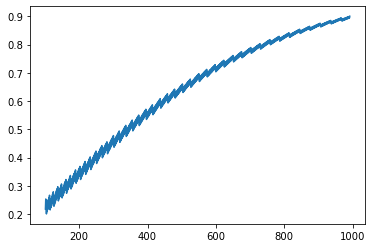

In [61]:
#EXERCISE 1:

%matplotlib inline
import scipy.stats as sp
import matplotlib.pyplot as plt
import numpy as np
import math as mt


#section a)
p=0.5
Ntot=250
Nmax=140
Nmean=int(250/2)
l=[]

def function1(p,k,Ntot):
    l=[]
    for n in range(Nmean-(k-Nmean)+1,Nmean+(k-Nmean)):
        l.append(mt.factorial(Ntot)/(mt.factorial(n)*mt.factorial(Ntot-n))*p**n*(1-p)**(Ntot-n))
    print("k=",k,":",(1-np.sum(l))*100)
    
#it wil calculate from 111 to 139
function1(p,Nmax,Ntot) 
#section c) We repeat for Nmax=146
Nmax=146
function1(p,Nmax,Ntot) 

#section d)
p=0.55
Nmax=141
Ntot=250
 
#function that returns the power of the test
def power_2(p,k,Ntot):
    l=[]
    for n in range(0,Ntot+1):
        l.append(mt.factorial(Ntot)/(mt.factorial(n)*mt.factorial((Ntot)-n))*p**n*(1-p)**(Ntot-n))
    prob=0
    if k>=(Ntot/2):
        for n in range(0,Ntot-k+1):
            prob=prob+l[n]
        for n in range(k,Ntot+1):
            prob=prob+l[n]
        return(prob)
    if k<(Ntot/2):
        for n in range(0,k+1):
            prob=prob+l[n]
        for n in range(Ntot-k,Ntot+1):
            prob=prob+l[n]
        return(prob)


print("p=",p,power_2(p,Nmax,Ntot))
p=0.6
print("p=0.6",power_2(0.6,Nmax,Ntot))

#section e)
pnull=0.5
a=0.05

#function that determines the number of heads that we need to accept Ho
def nsig(a,p,Ntot):
    l=[]
    for n in range(0,Ntot+1):
        l.append(mt.factorial(Ntot)/(mt.factorial(n)*mt.factorial((Ntot)-n))*p**n*(1-p)**(Ntot-n))
    dif=1
    nfin=0
    for i in range(int(Ntot/2),Ntot+1):
        prob=0
        #calculate cumulative prob up until certain element
        for j in range(i,Ntot+1):
            prob=prob+2*l[j]
        #find the # of flips for when the prob=significance (critical value) 
        if abs((prob-a))<=dif:
            dif=abs(prob-a)
            nfin=i
    return(nfin-1)

a=0.05
p=0.55
pw=0
#set initial n to avoid too much computation time
n=100
conf=90
pwlist=[]
num=[]
#calculate power for different #of coin flips
while pw*100<conf:
    n=n+1
    num.append(n)
    nk=nsig(a,pnull,n)
    pw=power_2(p,nk,n)
    pwlist.append(pw)
print("n_min=",n)

plt.plot(num,pwlist)


0.47567793518287516


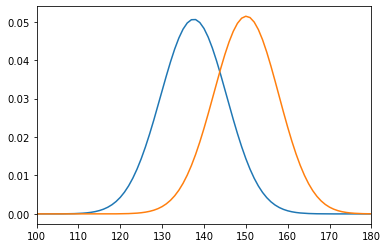

In [35]:
#plot part d

p=0.56
Ntot=250

def power_2(p,k,Ntot):
    l=[]
    for n in range(0,Ntot+1):
        l.append(mt.factorial(Ntot)/(mt.factorial(n)*mt.factorial((Ntot)-n))*p**n*(1-p)**(Ntot-n))
    

    prob=0
    if k>=(Ntot/2):
        for n in range(0,Ntot-k+1):
            prob=prob+l[n]
        for n in range(k,Ntot+1):
            prob=prob+l[n]
        return(prob,l)
    if k<(Ntot/2):
        for n in range(0,k+1):
            prob=prob+l[n]
        for n in range(Ntot-k,Ntot+1):
            prob=prob+l[n]
        return(prob,l)
        
pmf=[]
num=[]
for i in range(0,Ntot+1):
    num.append(i)
plt.plot(num,power_2(0.55,141,Ntot)[1],power_2(0.6,141,Ntot)[1])
plt.xlim([100, 180])
print(power_2(p,141,Ntot)[0])



2.0
0.05920773163466455
p-val= 0.015986251821180075


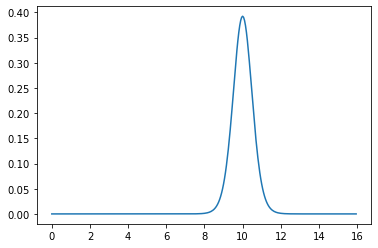

In [57]:
#EXERCISE 3

%matplotlib inline
import scipy.stats as sp
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import scipy.optimize as so
import scipy.integrate as integrate
import scipy.special as special
a=0.05
n=16
mu=10
mean=11
var=2

#part a) (probably needs changing bc error in the problem description)
t=(mean-mu)/(var/(mt.sqrt(n)))
print(t)
po=mt.gamma(n/2)/(mt.sqrt((n-1)*mt.pi)*mt.gamma((n-1)/2))*(1+t**2/(n-1))**(-n/2)
print(po)

#part b) calculate p(t,ho) for different values of the mean and determine the rejection region

#calculates statistic
def fun(mean):
    return(mean-mu)/(var/(mt.sqrt(n)))

#student-t distr.-significance
def fun2(mean):
    return(mt.gamma(n/2)/(mt.sqrt((n-1)*mt.pi)*mt.gamma((n-1)/2))*(1+(fun(mean))**2/(n-1))**(-n/2)-a)
#same without significance
def fun3(mean):
    return(mt.gamma(n/2)/(mt.sqrt((n-1)*mt.pi)*mt.gamma((n-1)/2))*(1+(fun(mean))**2/(n-1))**(-n/2))

t1 = np.arange(0, 16.0, 0.05)
plt.plot(t1, fun3(t1))

#calculate power of H1 
r1 = integrate.quad(lambda mean: fun3(mean), 11, 100)

print("p-val=",r1[0])





In [60]:
#EXERCISE 4

import scipy.integrate as integrate
import scipy.special as special
from statsmodels.stats.weightstats import ztest


def gaus(z):
    return(1/(mt.sqrt(2*mt.pi))*mt.exp(-(z**2)/2))
#we set the value of n that gives us power=0.9
n=29
xt=46.19 #calculated manually in part a)
zt=(xt-45)/(5/(mt.sqrt(n)))

print("z_crit=",zt)
result = integrate.quad(lambda z: gaus(z), zt, 100)

print((1-result[0])*100)


z_crit= 1.2816692240980094
90.00206473231155


In [59]:
#EXERCISE 6

%matplotlib inline
import scipy.stats as sp
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import scipy.optimize as so
import scipy.integrate as integrate

#define parameters and create data
so=1
n=12
a=0.05


data=[]
data.append(1.76)
data.append(-2.28)
data.append(-0.56)
data.append(1.46)
data.append(0.59)
data.append(1.26)
data.append(-1.94)
data.append(-0.79)
data.append(-0.86)
data.append(-1.41)
data.append(2.07)
data.append(1.30)


#calculate mean
mean=sum(data)/(len(data))
print("mean=",mean)

#calculate sample variance
var=0
for i in range(0,n):
    var=var+(data[i]-mean)**2/(n-1)
print("var=",var)
    
s=np.sqrt(var)
#calculate statistic
def tstat(n,s,so):
    return((n-1)*(s/so)**2)

print("deviation=",s,"stat=",tstat(n,s,so))
t=tstat(n,s,so)

#define chi^2 function
def chi(x,n):
    return(0.5**(n/2)/(mt.gamma(n/2))*x**(n/2-1)*np.exp(-x/2))

#run test (integrate chi^2 function)
def test(x0,x1,n):
    return(integrate.quad(lambda x: chi(x,n),x0,x1))


print("p-val=",1-test(0,t,n-1)[0])

#find critical value of chi(a=0.05) 
print(" the critical value at a=0,05 is 19.675:",1-test(0,19.675,n-1)[0])



mean= 0.050000000000000024
var= 2.3397454545454544
dev= 1.5296226510304607 stat= 25.737199999999998
p-val= 0.007100031368917792
 the critical value at a=0,05 is 19.675: 0.05000206180187894


100.0
p_value= 1.372911625782498e-10


Text(0, 0.5, 'counts')

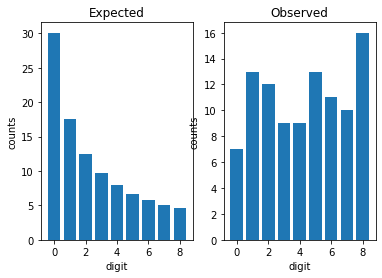

In [75]:
#EXERCISE 7

%matplotlib inline
import scipy.stats as sp
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import scipy.optimize as so
import scipy.integrate as integrate

#create lists with experimental data and background(null hypothesis)
data=[7,13,12,9,9,13,11,10,16]

bkg=[30.1,17.6,12.5,9.7,7.9,6.7,5.8,5.1,4.6]

# run chi^2 test
c2_stat, p_val = sp.chisquare(data,bkg)

print("p_value=",p_val)


plt.subplot(1, 2, 1)
plt.bar(range(9),bkg)
plt.title("Expected")
plt.xlabel('digit')
plt.ylabel('counts')

plt.subplot(1, 2, 2)
plt.bar(range(9),data)
plt.title("Observed")
plt.xlabel('digit')
plt.ylabel('counts')



In [1]:
#from this cell on it's just discarded material        
    print(n,l[n])
    print("max(l)=",max(l))

IndentationError: unexpected indent (<ipython-input-1-f453bbf65980>, line 2)

In [ ]:

def function2(p,k,Ntot):
    l=[]
    for n in range(0,Ntot+1):
        l.append(mt.factorial(Ntot)/(mt.factorial(n)*mt.factorial((Ntot)-n))*p**n*(1-p)**(Ntot-n))
    prob=0
    for n in range(0,Ntot+1):
        if l[n]>l[k]:
            l[n]=0
        prob=prob+l[n]
    print(prob*100)
    
    
    
    
def power(p,k,Ntot):
    l=[]
    for n in range(0,Ntot+1):
        l.append(mt.factorial(Ntot)/(mt.factorial(n)*mt.factorial((Ntot)-n))*p**n*(1-p)**(Ntot-n))
    prob=0
    for n in range(0,Ntot-k+1):
        prob=prob+l[n]
    for n in range(k,Ntot+1):
        prob=prob+l[n]
    return(prob)



guess=8
func=lambda mean: fun2(mean)
sol = fsolve(func,guess)
print(sol)

guess=12
func=lambda mean: fun2(mean)
sol = fsolve(func,guess)
print(sol)